# Final Project (Group: Kim Lam and Sydney Ross)
Undergraduate students and Graduate students - Groups of 1-3 Allowed

Use Tensorflow or any AI-related technology and what we did in class to perform the following:

List your group name - Team Members
Create a problem statement
Retrieve a dataset or create one.
Implement algorithm
Use the dataset to make predictions
If possible, create a GUI
Name the application
Indicate if you would be interested in presenting
Required deliverables:

Link to the dataset (you do not necessarily have to upload the dataset itself)
Source code
Output
Screenshots
1-3 Paragraph Explanation

In [ ]:
!pip install tensorflow

In [ ]:
!pip install Pillow

**Problem Statement:** With the state of the world today, online communciations and postings are becoming increasingly popular. With that being said, it is important to be able to recognize the sentiment of virtual text. The biggest inticator of mood and text tone is emojis. However, are the emoji sentiments consistent? We want to find correlations and groupings of emojis to better group the emojis into sentiment groupings. 

Research Sources:
- DATASET: https://www.kaggle.com/datasets/subinium/emojiimage-dataset?select=full_emoji.csv
- Another emoji dataset: https://github.com/iamcal/emoji-data
- K-means clustering with emojis: https://www.sidework.ai/blog/2020/09/24/emoji-clusters-kmeans
- K-means: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/


*   Stack Overflow
*   https://www.tensorflow.org/tutorials/keras/classification




**Explanation:**

This assignment was really interesting. We wanted to utilize tensorflow but apply it to image classification, so we used the Keras model in the tensorflow library. Here we played around with different categories of emotions that emojis typically represent. Since we had such a small working dataset, we had to cut back on some specific categories. Overall we used the main 8 sentiments: Happy, Sarcasam, Neutral, Surprise, Anger, Disgust, Sad, and Fear. In a further development of this concept we could potentially add curious, flirty, tired/relaced, and proud. We think that these other categories might make the sentiments more accurate to real life, however since the dataset is so small (once cleaned), we thought this would cloud the AI's ability to learn. 

We also played around with different densities for our model and running through various numbers of epoch to find the most accurate model. Overall, we averaged about 43%-50% accurate. Obviously this is pretty low, however we believe this is due to the size of usable data. Even though our original dataset was about 2,000 rows, not all of the emojis are used for sentiments. For example, there is a whole section of just occupation related emoticons. These are all kind of neutral or depend on the context, so we found them hard to label (hand categorize). If we had a bigger dataset of simple emotion based emoticons, or even applied this idea to images of real people's faces (or something), we think we would have a higher accuracy. The model just runs out of data for it to be trained with the precision and accuracy that we had hoped for. 




#Application Name: Emoji Sentiment Analyzer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydotplus #pip install pydotplus
import graphviz 

import tensorflow as tf
import keras

from PIL import Image
import io
import os
import glob
import base64
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#For Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#Import directly from Google Sheets
worksheet = gc.open('emojiSentimentSet').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI,Labels
1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",,,,Happy
2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M...",Happy
3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",,,Happy
4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//...",Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,🤦‍♀️,U+1F926 U+200D U+2640 U+FE0F,woman facepalming,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,Disgust
178,🤷,U+1F937,person shrugging,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,Anger
179,🤷‍♂️,U+1F937 U+200D U+2642 U+FE0F,man shrugging,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,Anger
180,🤷‍♀️,U+1F937 U+200D U+2640 U+FE0F,woman shrugging,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","d

In [ ]:
#Data clean up
data = data.drop([1], axis = 1)
data = data.drop([2], axis = 1) #Description of each emoji
#data = data.drop([3], axis = 1) #Keeping the Apple emoji base64 encoding
data = data.drop([4], axis = 1) 
data = data.drop([5], axis = 1)
data = data.drop([6], axis = 1)
data = data.drop([7], axis = 1)
data = data.drop([8], axis = 1)
data = data.drop([9], axis = 1)
data = data.drop([10], axis = 1)
data = data.drop([11], axis = 1)
data = data.drop([12], axis = 1)
data = data.drop([13], axis = 1)

In [ ]:
data

,0,3,14
0,emoji,Apple,Labels
1,😀,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
2,😃,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
3,😄,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
4,😁,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
...,...,...,...
177,🤦‍♀️,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Disgust
178,🤷,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Anger
179,🤷‍♂️,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Anger
180,🤷‍♀️,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Anger


In [ ]:
#data[1] = data[1].astype(object).astype(float)

In [ ]:
dataLen = len(data)
dataLen

182

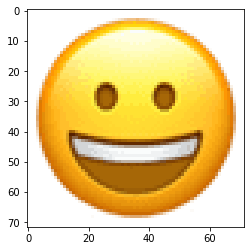

In [ ]:
base64_decoded = base64.b64decode(data[3][1].split(',')[-1])
image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')

plt.imshow(image)

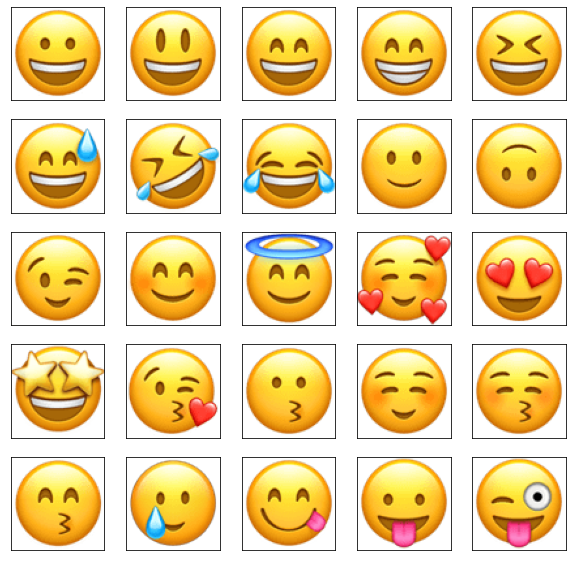

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    base64_decoded = base64.b64decode(data[3][i].split(',')[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    plt.imshow(image)

In [ ]:
emojiSet = []

for x in range(0,dataLen-1):
  base64_decoded = base64.b64decode(data[3][x+1].split(',')[-1])
  image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
  emojiSet.append(image)

emojiSet
#print(len(emojiSet))

[<PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92258A10>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92360E90>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D922B2790>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92258810>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9230DDD0>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D928EC690>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92914950>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9243E850>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92281750>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D923DF210>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9230D650>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92382110>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D922B2990>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D928EC910>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92281E10>,
 <PIL.Image.Image image m

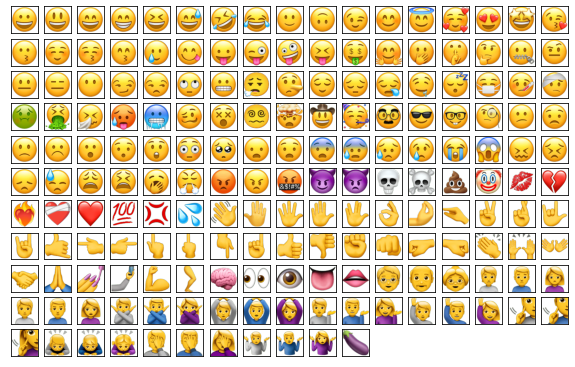

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emojiSet)):
  plt.subplot(17,17,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(emojiSet[i])

In [ ]:
#Categories for sentiment
#joy,sadness,anger,neutral,fear,shock,sarcasam,flirty,curious,embarrassment

#USED THESE ONES
classNames = ['Happy', 'Sarcasam', 'Surprise', 'Fear', 'Neutral', 'Anger', 'Sad', 'Disgust']

In [ ]:
data.fillna("Neutral") #fill nulls with a value
data = data.replace('', "Neutral")

In [ ]:
data.loc[25]

0                                                     😜
3     data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
14                                                Happy
Name: 25, dtype: object

In [ ]:
#Drop first row (headers)
data = data.drop([0], axis=0)

In [ ]:
print("Distribution of data: ")
print(data[14].value_counts(dropna=False))
    
labels, uniques = pd.factorize(data[14])

print(labels)
print(len(labels))
print(uniques)

data = data.drop([14], axis=1) 
data.insert(0, column = 14, value = labels)

Distribution of data: 
Happy       49
Sarcasam    28
Neutral     28
Anger       23
Sad         23
Surprise    13
Disgust      9
Fear         8
Name: 14, dtype: int64
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 2 4 4 4
 0 5 5 1 2 5 0 6 6 0 1 3 3 3 7 7 6 7 7 3 2 2 2 0 0 2 0 1 2 2 6 6 6 2 2 2 2
 6 6 6 3 3 6 6 6 3 6 6 6 6 6 6 1 5 5 5 5 0 5 5 5 7 1 0 6 0 6 0 0 5 1 0 4 4
 4 1 4 4 4 0 0 0 5 0 4 4 4 5 4 4 0 7 4 5 4 4 0 0 4 4 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 5 5 6 6 6 5 5 5 4 4 4 1 1 1 4 4 4 4 4 4 1 1 1 7 7 7 5 5 5 0]
181
Index(['Happy', 'Sarcasam', 'Surprise', 'Fear', 'Neutral', 'Anger', 'Sad',
       'Disgust'],
      dtype='object')


In [ ]:
#Drop Apple base64 encoding
data = data.drop([3], axis = 1) #Apple emoji base64 encoding

In [ ]:
data

,14,0
1,0,😀
2,0,😃
3,0,😄
4,0,😁
5,0,😆
...,...,...
177,7,🤦‍♀️
178,5,🤷
179,5,🤷‍♂️
180,5,🤷‍♀️


In [ ]:
#Data split
X = data[0]
print(X)
y = data[14]
print(y)

1         😀
2         😃
3         😄
4         😁
5         😆
       ... 
177    🤦‍♀️
178       🤷
179    🤷‍♂️
180    🤷‍♀️
181       🍆
Name: 0, Length: 181, dtype: object
1      0
2      0
3      0
4      0
5      0
      ..
177    7
178    5
179    5
180    5
181    0
Name: 14, Length: 181, dtype: int64


In [ ]:
X = emojiSet
print(X)
print(len(X))

[<PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92258A10>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92360E90>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D922B2790>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92258810>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9230DDD0>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D928EC690>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92914950>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9243E850>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92281750>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D923DF210>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D9230D650>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92382110>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D922B2990>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D928EC910>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7F4D92281E10>, <PIL.Image.Image image mode=RGBA size=7

In [ ]:
#Test/Train Split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

144
37
144
37


TensorFlow Image Classification

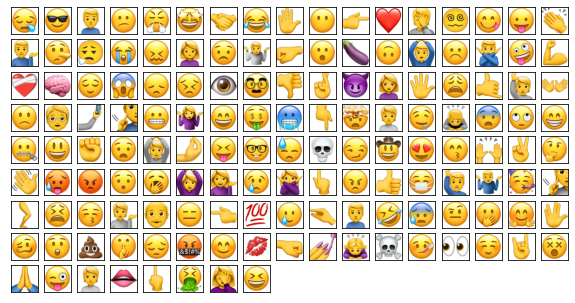

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(x_train)):
  plt.subplot(17,17,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])

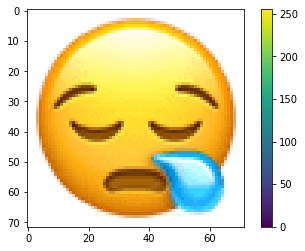

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(72, 72, 4)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              #loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

In [ ]:
#from keras import backend as K
for i in range (len(x_train)):
  img = x_train[i]
  img = np.asarray(img)
  x_train[i] = img

for i in range(len(x_test)):
  img = x_test[i]
  img = np.asarray(img)
  x_test[i] = img

In [ ]:
x_train = np.array([np.array(val) for val in x_train])
x_test = np.array([np.array(val) for val in x_test])

In [ ]:
print("----shape of x_train-----")
print(x_train.shape)
print("----shape of each x_train element-----")
print(x_train[1].shape)
print("----shape of x_test-----")
print(x_test.shape)
print("----shape of each x_test element-----")
print(x_test[1].shape)
print("----shape of y_train-----")
print(y_train.shape)
print("----shape of y_train elements-----")
print(y_train[1].shape)
print("-----shape of y_test-----")
print(y_test.shape)
print("----shape of y_test elements-----")
print(y_test[1].shape)

----shape of x_train-----
(144, 72, 72, 4)
----shape of each x_train element-----
(72, 72, 4)
----shape of x_test-----
(37, 72, 72, 4)
----shape of each x_test element-----
(72, 72, 4)
----shape of y_train-----
(144,)
----shape of y_train elements-----
()
-----shape of y_test-----
(37,)
----shape of y_test elements-----
()


In [ ]:
model.fit(x_train, y_train, epochs=80)

Epoch 1/80
5/5 [==============================] - 0s 19ms/step - loss: 4179.4556 - accuracy: 0.1528
Epoch 2/80
5/5 [==============================] - 0s 18ms/step - loss: 4931.8696 - accuracy: 0.1458
Epoch 3/80
5/5 [==============================] - 0s 19ms/step - loss: 2164.2349 - accuracy: 0.2569
Epoch 4/80
5/5 [==============================] - 0s 19ms/step - loss: 1723.9026 - accuracy: 0.2292
Epoch 5/80
5/5 [==============================] - 0s 21ms/step - loss: 1090.8748 - accuracy: 0.3681
Epoch 6/80
5/5 [==============================] - 0s 20ms/step - loss: 560.8542 - accuracy: 0.3611
Epoch 7/80
5/5 [==============================] - 0s 21ms/step - loss: 312.1007 - accuracy: 0.4653
Epoch 8/80
5/5 [==============================] - 0s 19ms/step - loss: 275.8591 - accuracy: 0.5556
Epoch 9/80
5/5 [==============================] - 0s 22ms/step - loss: 301.0524 - accuracy: 0.5000
Epoch 10/80
5/5 [==============================] - 0s 21ms/step - loss: 195.8024 - accuracy: 0.5417
Epoc

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 327.2530 - accuracy: 0.4324 - 157ms/epoch - 78ms/step

Test accuracy: 0.4324324429035187


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
print(y_test[0])

1


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label], 100*np.max(predictions_array),
                                  classNames[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

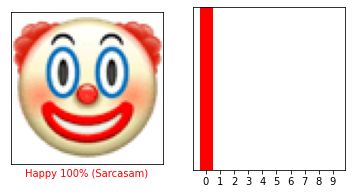

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

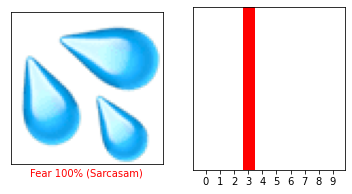

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

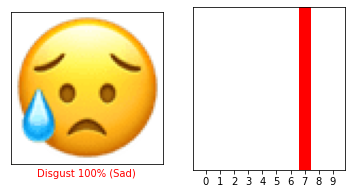

In [ ]:
i = 35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

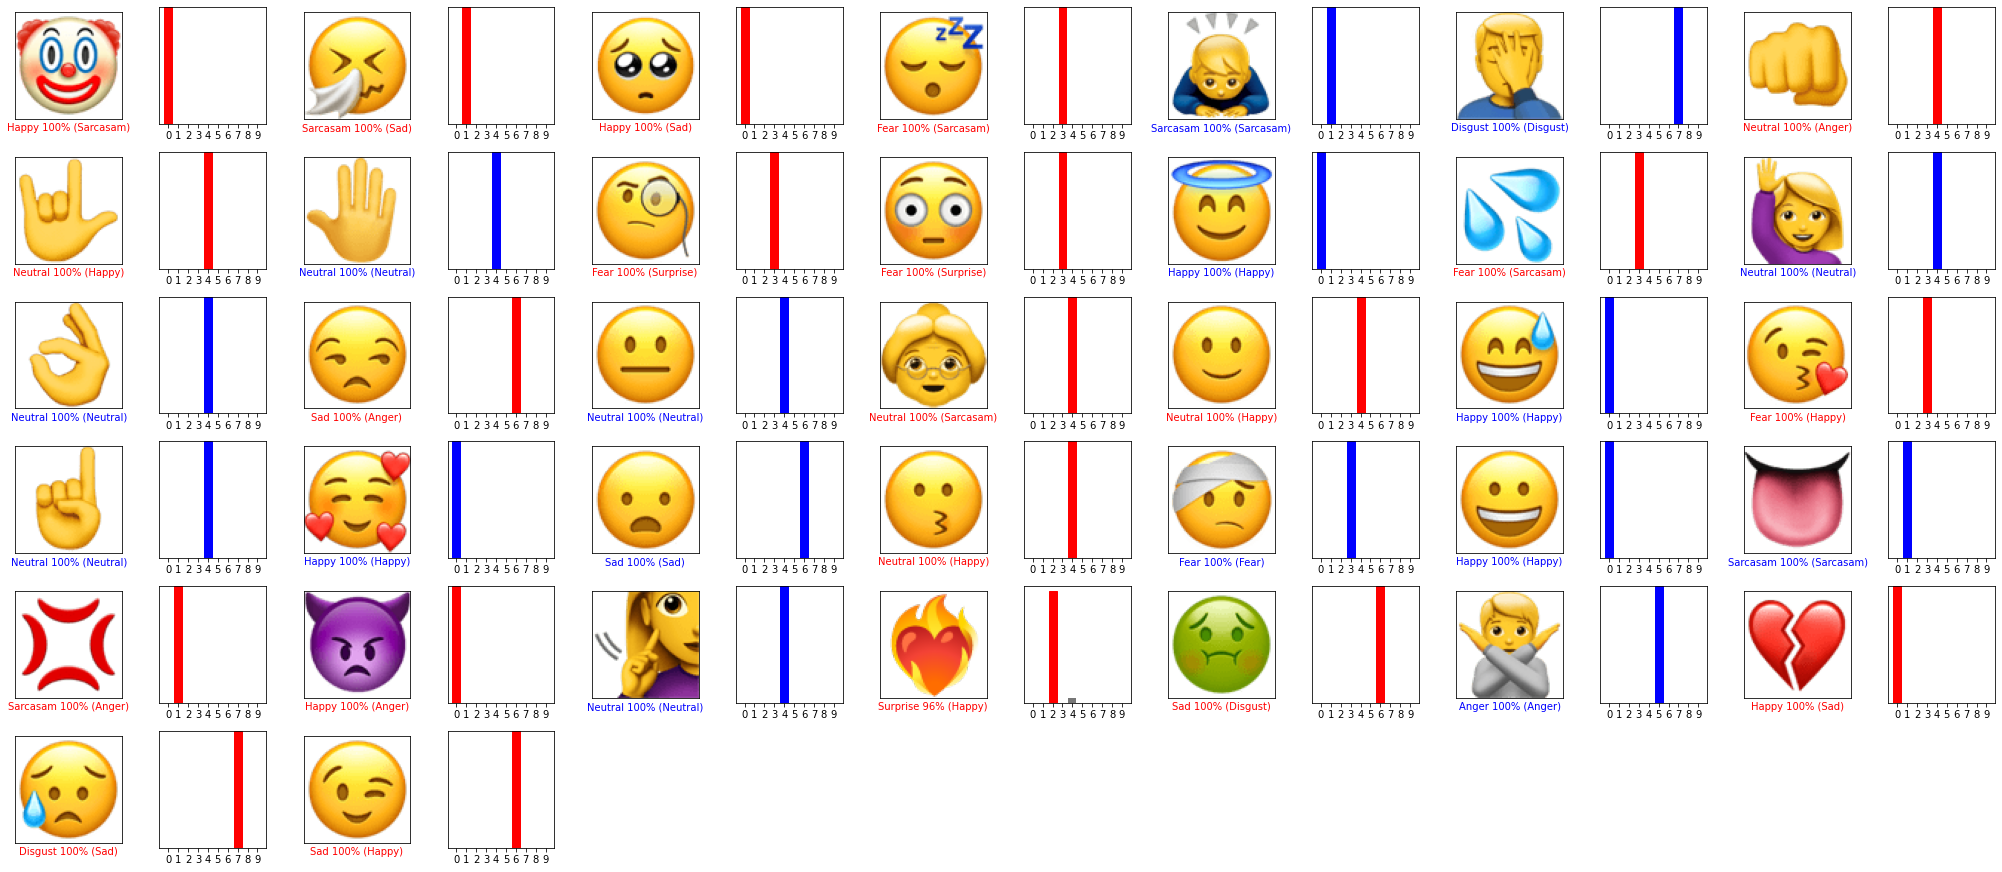

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 7
num_images = len(x_test)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()